In [7]:
#Management of the dataset by replacing the "?" by "NaN" and counting them. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

df_nan = df.replace("?", np.nan)


df1 = df_nan.convert_objects(convert_numeric=True)


df1.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [10]:
# 1) Handle NaN's
#To handle Nan we have to see correlation between variables. But according to data, 
#size higher than 100 NaN values can be effect data. We can fill features which have 
#lower than 100 Nan values with median values.

In [11]:
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Num of pregnancies'].fillna(df1['Num of pregnancies'].median(), inplace = True)
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Smokes'].fillna(0,inplace = True)
df1['Number of sexual partners'].fillna(df1['Number of sexual partners'].median(), inplace = True)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(df1.loc[l,'Smokes (years)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(0)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(df1.loc[l,'Smokes (packs/year)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(0)
df2 = df1.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis = 1)

In [12]:
#1.1)Hormonal Contraceptives (HC)
#In the data diagnosis data have too much Nan values. Because of that we cannot determine effect 
#of this data. We have to drop them. Then using pearson correlation we can determine which feature
#is effect 'Hormonal Contraceptives'.

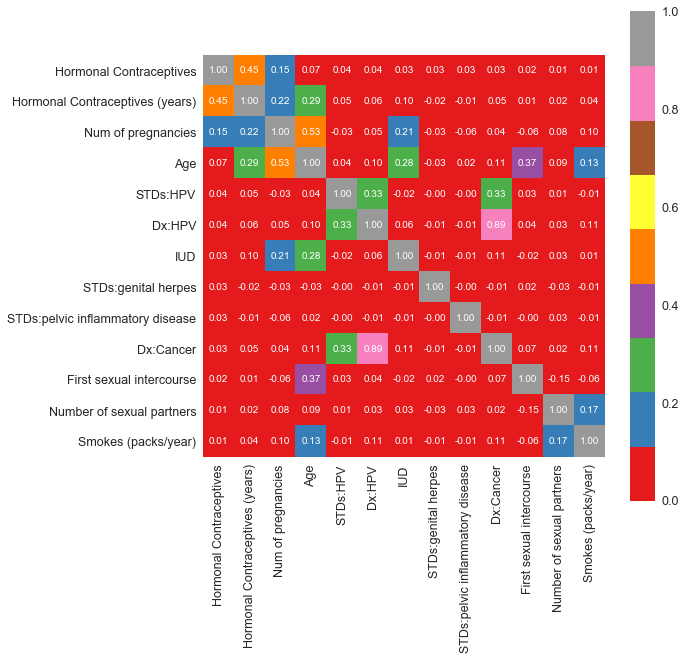

In [13]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Hormonal Contraceptives')['Hormonal Contraceptives'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Set1' ,annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [15]:
#According to heatmap, we have to fill Nan values with corralated features.

In [16]:
# If patient is older than sample mean or number of pregnancies is lower than mean then patient may take Hormonal Contraceptives
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)
l = (df2['Num of pregnancies']<df2['Num of pregnancies'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)
df2['Hormonal Contraceptives'].fillna(0,inplace = True)

df2['Hormonal Contraceptives'].isnull().sum()

0

In [17]:
#For HC(years) NaN values we can fill with median values by using HC feature.

In [18]:
l = (df2['Hormonal Contraceptives'] == 1)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(df2['Hormonal Contraceptives (years)'].median())
l = (df2['Hormonal Contraceptives'] == 0)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(0)

In [19]:
#Also we need to check relationship between HC and HC (years)

In [20]:
len(df2[(df2['Hormonal Contraceptives'] == 1) & (df2['Hormonal Contraceptives (years)'] == 0) ])

0

In [21]:
len(df2[(df2['Hormonal Contraceptives'] == 0) & (df2['Hormonal Contraceptives (years)'] != 0) ])

0

In [22]:
#1.2) IUD
#Using pearson correlation we can determine which feature is effect 'IUD'.

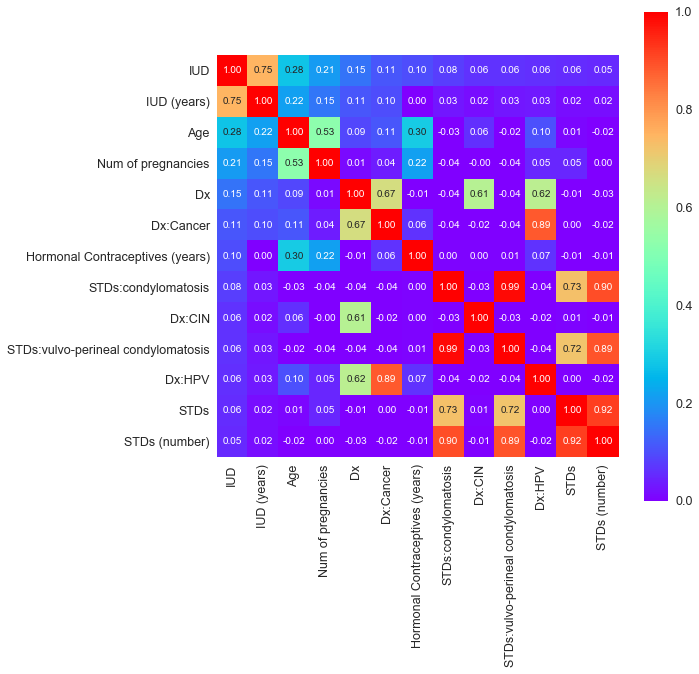

In [23]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'IUD')['IUD'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'rainbow', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [24]:
#This figure show that Age and Number of pregnancies features have effect on IUD feature.

In [25]:
len(df2[(df2['Age']>df2['Age'].mean())&(df2['IUD']==1)])

66

In [26]:
len(df2[df2['IUD']==1])

83

In [28]:
#This show that %80 of patients who take IUD are older than age mean. We can fillna values according to this discovery.

In [29]:
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'IUD'] = df2.loc[l,'IUD'].fillna(1)

len(df2[(df2['Num of pregnancies']<df2['Num of pregnancies'].mean())&(df2['IUD']==0)])

458

In [30]:
len(df2[df2['IUD']==0])

658

In [31]:
#%70 of patients who do not take IUD have lower number of pregnancies than mean 
#of number of pregnancies. We can fill remaining NaN with 0 values.

In [32]:
df2['IUD'].fillna(0, inplace = True)

In [33]:
#For IUD (years) feature we can fill NaN values with IUD feature.

In [34]:
l = (df2['IUD'] == 1)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(df2['IUD (years)'].median())
l = (df2['IUD'] == 0)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(0)

In [35]:
#Also we need to check relationship between IUD and IUD (years)

In [36]:
len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])

38

In [37]:
#If patient take IUD then UID (years) have to be non zero values then we need to change it to mean values.

In [38]:
l = (df2['IUD'] == 1) & (df2['IUD (years)'] == 0)
df2.loc[l,'IUD (years)'] = df2['IUD (years)'].mean()

len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])

0

In [39]:
len(df2[(df2['IUD'] == 0) & (df2['IUD (years)'] != 0) ])

0

In [40]:
#1.3)STDs

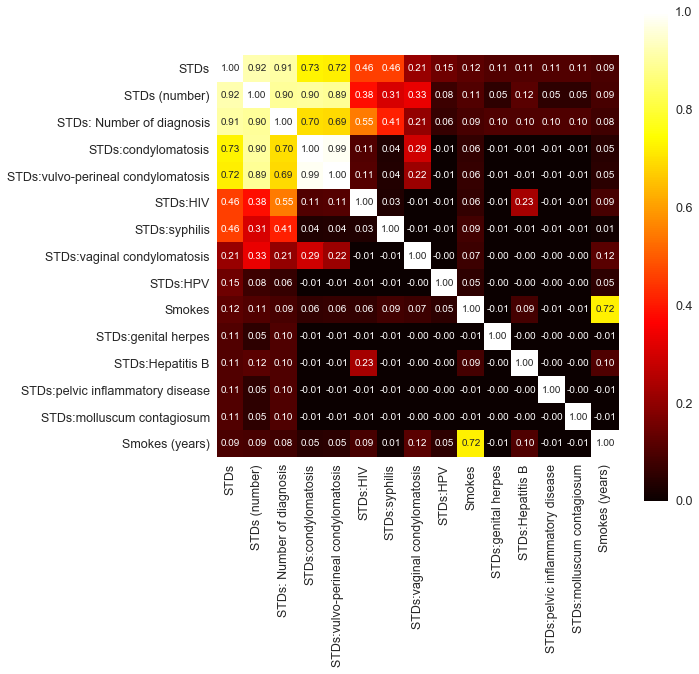

In [41]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'STDs')['STDs'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'hot', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [42]:
#According to heatmap we can easily say that 'STDs:condylomatosis' and STDs:vulvo-perineal condylomatosis' features effect 
#'STDs'. We cannot take 'STD (number)' and 'STDs: Number of diagnosis' because they are same features as 'STDs'.According to 
#our knowledge about STDs we can easily fill Nan values with 1 or zero because if patient have any of STDs diseases then 
#patient STDs feature must be 1 others must be zero.

In [43]:
df3 = df2.copy()

l = (df3['STDs:condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:cervical condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vaginal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vulvo-perineal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:syphilis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:pelvic inflammatory disease']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:genital herpes']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:molluscum contagiosum']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:AIDS']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HIV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:Hepatitis B']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HPV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

In [44]:
#It seems that STDs and STD diseases features are paralel. 
#According to that we have to look other features. 
#Smokes and IUD features can be used.

In [45]:
len(df[(df3['STDs'] == 1)])

79

In [46]:
len(df3[(df3['Smokes'] == 0) & (df3['STDs'] == 1)])

58

In [47]:
#According to data %73 of patients who are not smoking have STD. But not have Nan values

In [48]:
l = (df3['Smokes']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

len(df3[(df3['IUD'] == 0) & (df3['STDs'] == 1)])

127

In [49]:
len(df3[df3['STDs']==1])

168

In [50]:
#%75 of patients who does not take IUD are also have STDs

In [51]:
l = (df3['IUD']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
df3['STDs'].fillna(0, inplace = True)

df3['STDs'].isnull().sum()

0

In [52]:
#Also STDs (number) is same feature as STDs.

In [53]:
df3['STDs (number)'].median()

0.0

In [54]:
#This case median is not useful so we can use mean values.

In [56]:
l = (df3['STDs']==1)
df3.loc[l,'STDs (number)'] = df3.loc[l,'STDs (number)'].fillna(df3['STDs (number)'].mean())
df3['STDs (number)'].fillna(0, inplace = True)

df3['STDs (number)'].isnull().sum()

0

In [57]:
#1.4)STDs Diseases

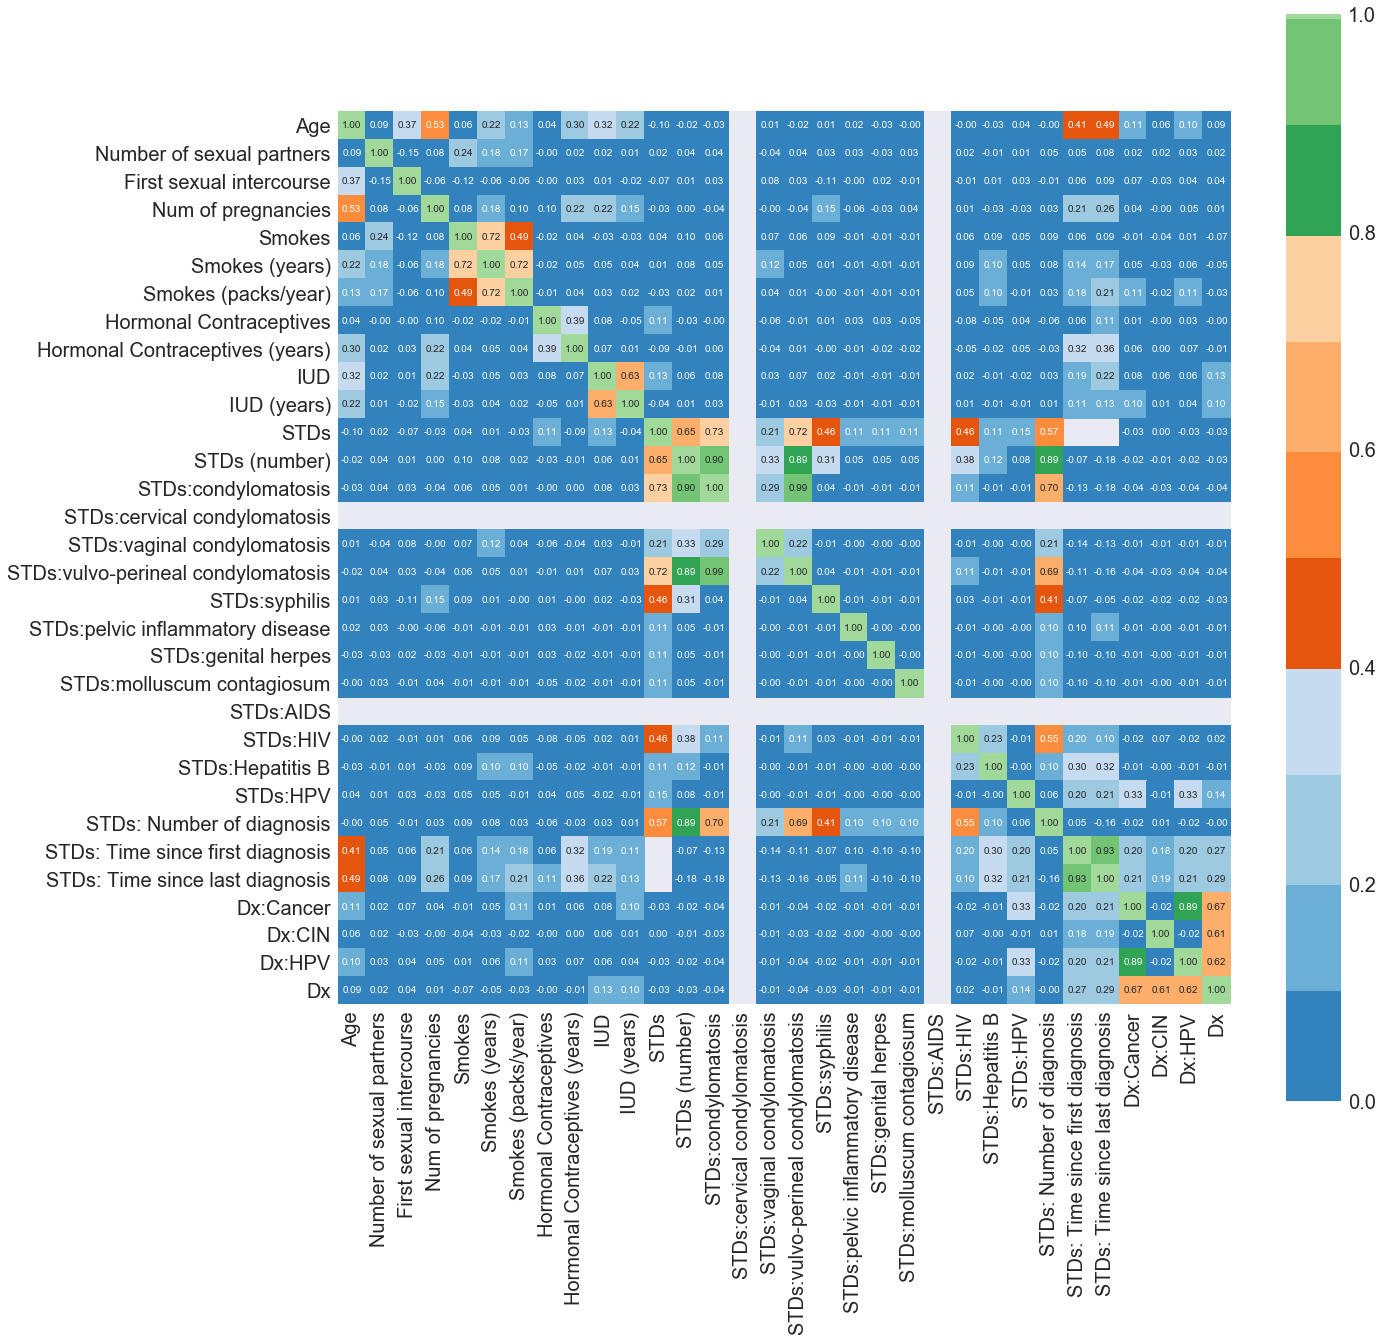

In [58]:
corrmat = df3.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'tab20c', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = df3.columns, xticklabels = df3.columns)
plt.show()

In [59]:
df4= df3.copy()

In [60]:
#According to heatmap and also our knowledge about field all STDs diseases depend on STDs feature and also STD (number).

In [61]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:condylomatosis'] = df4.loc[l,'STDs:condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:cervical condylomatosis'] = df4.loc[l,'STDs:cervical condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vaginal condylomatosis'] = df4.loc[l,'STDs:vaginal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vulvo-perineal condylomatosis'] = df4.loc[l,'STDs:vulvo-perineal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:syphilis'] = df4.loc[l,'STDs:syphilis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:pelvic inflammatory disease'] = df4.loc[l,'STDs:pelvic inflammatory disease'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:genital herpes'] = df4.loc[l,'STDs:genital herpes'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:molluscum contagiosum'] = df4.loc[l,'STDs:molluscum contagiosum'].fillna(0)

df4['STDs:molluscum contagiosum'].isnull().sum()

99

In [62]:
#For other values we have to fill Nan values with median because all STDs 
#depends on other STDs and also we cannot sure about person disease.

In [70]:
df4['STDs:condylomatosis'].fillna(df4['STDs:condylomatosis'].median(),inplace = True)
df4['STDs:cervical condylomatosis'].fillna(df4['STDs:cervical condylomatosis'].median(),inplace = True)
df4['STDs:vaginal condylomatosis'].fillna(df4['STDs:vaginal condylomatosis'].median(),inplace = True)
df4['STDs:vulvo-perineal condylomatosis'].fillna(df4['STDs:vulvo-perineal condylomatosis'].median(),inplace = True)
df4['STDs:syphilis'].fillna(df4['STDs:syphilis'].median(),inplace = True)
df4['STDs:pelvic inflammatory disease'].fillna(df4['STDs:pelvic inflammatory disease'].median(),inplace = True)
df4['STDs:genital herpes'].fillna(df4['STDs:genital herpes'].median(),inplace = True)
df4['STDs:molluscum contagiosum'].fillna(df4['STDs:molluscum contagiosum'].median(),inplace = True)

df4['STDs:condylomatosis'].isnull().sum()

0

In [65]:
#1.5)AIDS
#This feature correlation not show us any clue. But we know that AIDS also a STDs disease. Then we can fill NaN values as;

In [66]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:AIDS'] = df4.loc[l,'STDs:AIDS'].fillna(0)
df4['STDs:AIDS'].fillna(df4['STDs:AIDS'].median(),inplace = True)

df4['STDs:AIDS'].isnull().sum()

0

In [68]:
#1.6)STDs:HIV
#This feature effect by STD feature.

In [71]:
len(df4[df4['STDs:HIV']==1])


18

In [72]:
len(df4[(df4['STDs:HIV']==1) & (df4['STDs']==1)])

18

In [73]:
#%100 of patient who have STDs then they have STDs:HIV

In [74]:
l = (df4['STDs']==1)
df4.loc[l,'STDs:HIV'] = df4.loc[l,'STDs:HIV'].fillna(1)
df4['STDs:HIV'].fillna(0,inplace = True)

In [75]:
#Cheking contradiction values;

In [76]:
len(df4[(df4['STDs']==0) & (df4['STDs:HIV'] == 1)])

0

In [77]:
df4['STDs:HIV'].isnull().sum()

0

In [79]:
#1.7)STDs:Hepatitis B
#This feature effect by STDs:HIV feature.

In [80]:
len(df4[df4['STDs:Hepatitis B']==1])

1

In [81]:
#There is a one person who have disease. According to population this value is so minimal. We can fill Nan values with 0.

In [82]:
df4['STDs:Hepatitis B'].fillna(0, inplace = True)

df4['STDs:Hepatitis B'].isnull().sum()

0

In [83]:
#1.8)STDs:HPV

#But HPV's positive values are not enough. Null values cannot define by using important features. We can fill NaN values with 0.

In [84]:
df4['STDs:HPV'].fillna(0, inplace = True)

df4['STDs:HPV'].isnull().sum()

0

In [85]:
#1.9)STDs: Time since first diagnosis and STDs: Time since last diagnosis
#If patient STDs is zero then first diagnosis and last diagnosis cannot be a value. We can fill Nan values with this knowledge.


In [86]:
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since first diagnosis'] = df4.loc[l,'STDs: Time since first diagnosis'].fillna(df4['STDs: Time since first diagnosis'].median())
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since last diagnosis'] = df4.loc[l,'STDs: Time since last diagnosis'].fillna(df4['STDs: Time since last diagnosis'].median())
df4['STDs: Time since last diagnosis'].fillna(0, inplace = True)
df4['STDs: Time since first diagnosis'].fillna(0, inplace = True)

df4['STDs: Time since last diagnosis'].isnull().sum()

0

In [87]:
#2)Feature correlation
#All features pearson correlations between them after handling NaN values;

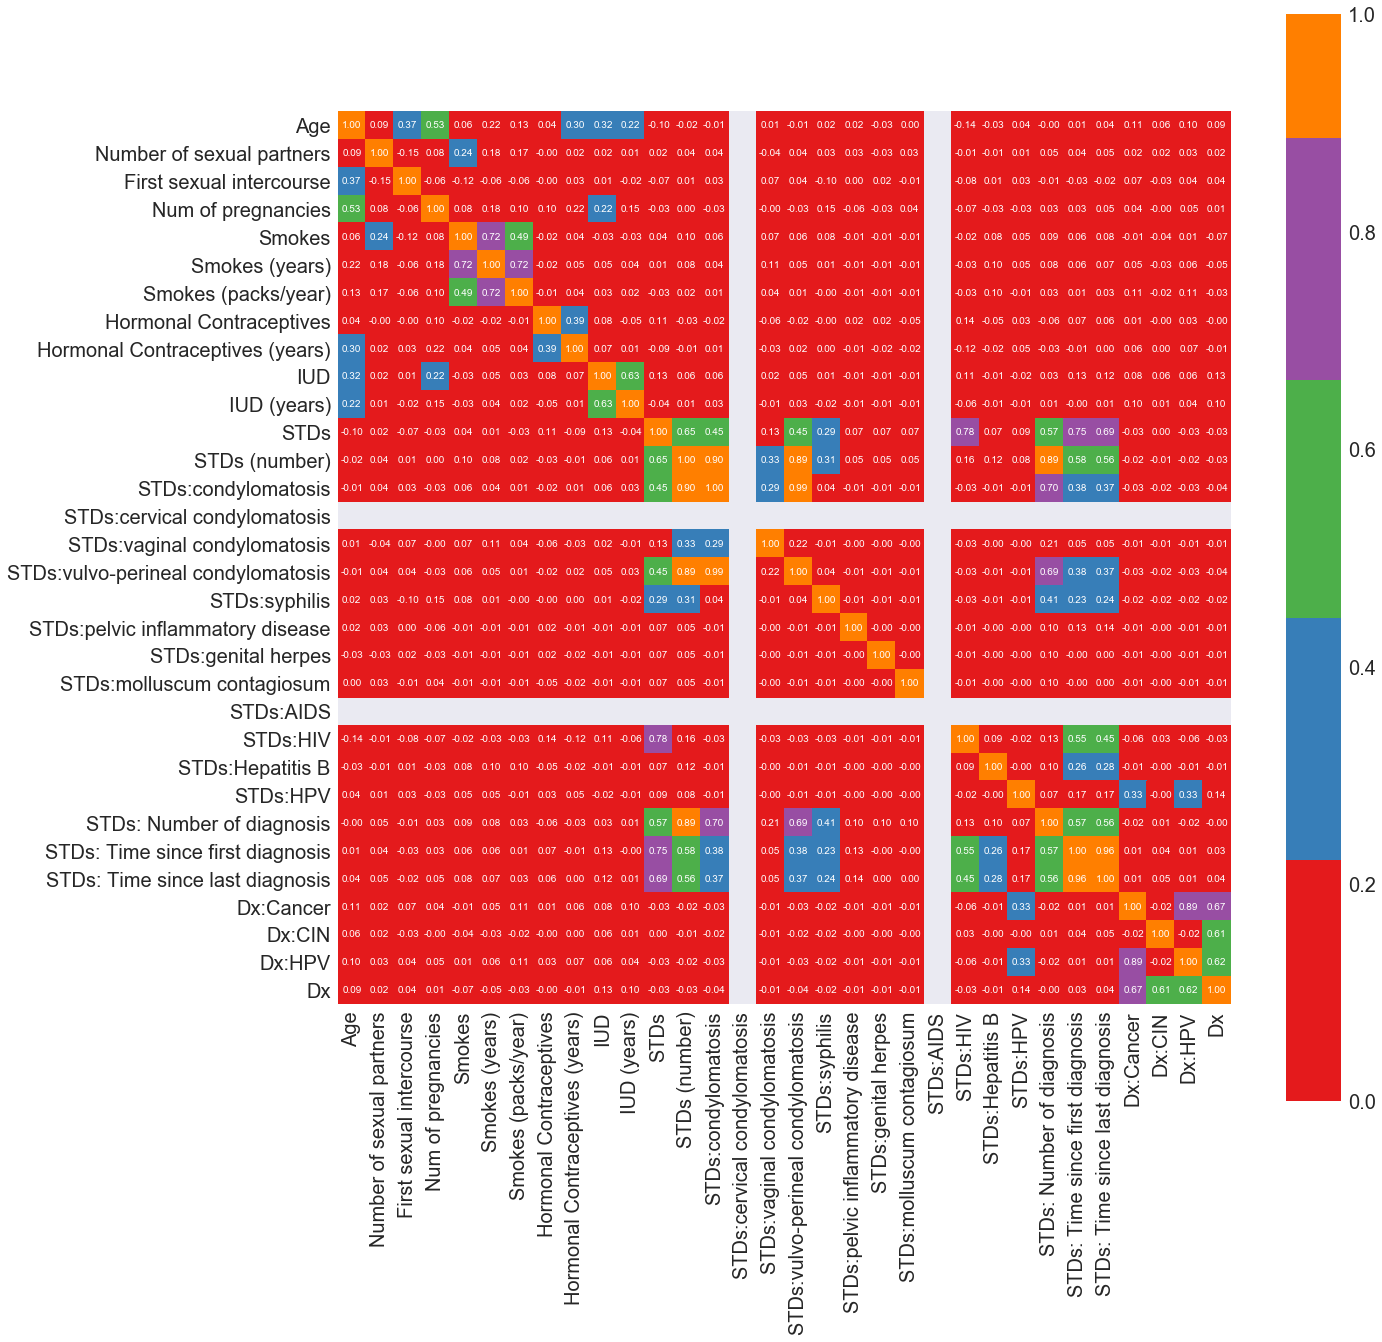

In [88]:
corrmat = df4.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = df4.columns, xticklabels = df4.columns)
plt.show()


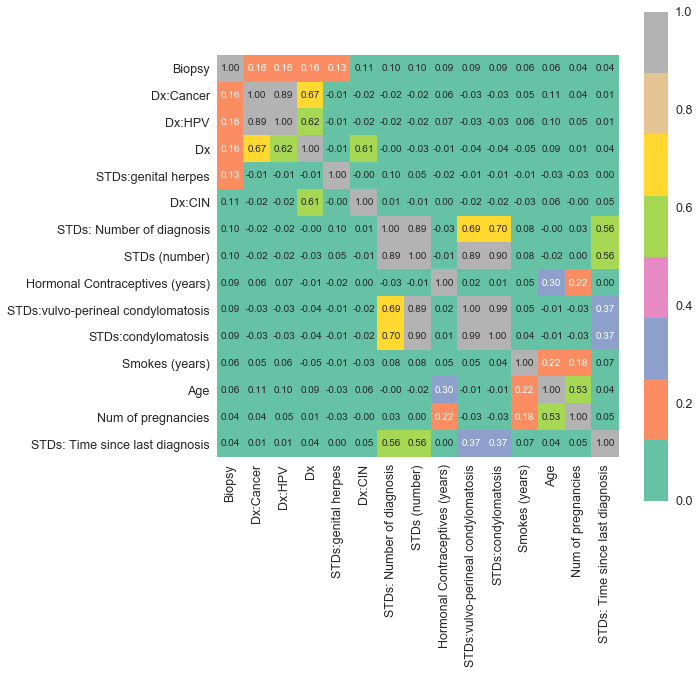

In [89]:
df4['Biopsy'] = df1['Biopsy']

corrmat = df4.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df4[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'Set2', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [90]:
#2.1)RandomForest for features

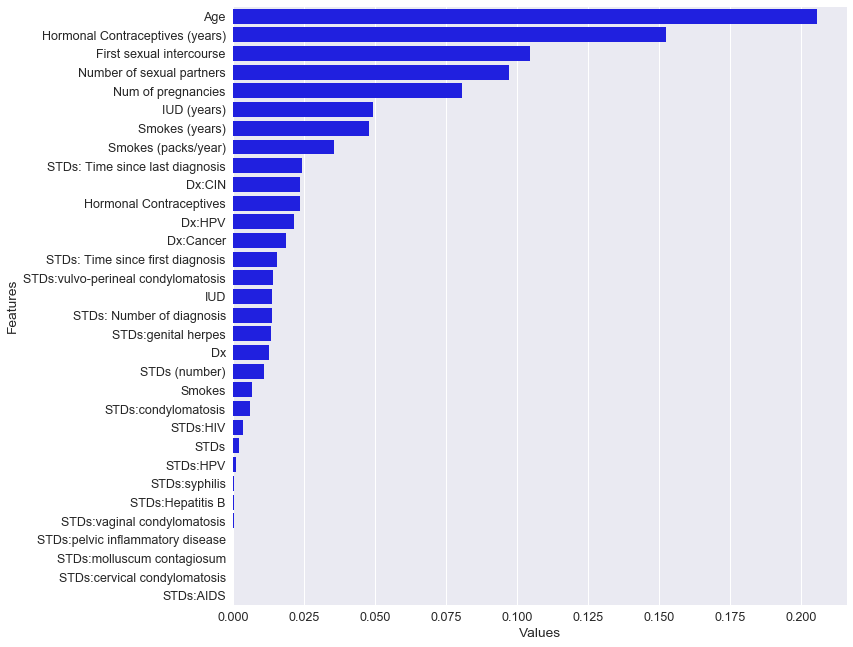

In [91]:
from sklearn.ensemble import RandomForestClassifier

X = df4.drop('Biopsy', axis =1)
Y = df4["Biopsy"]
names = X.columns
rf = RandomForestClassifier()
rf.fit(X, Y)

result_rf = pd.DataFrame()
result_rf['Features'] = X.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Blue")
plt.show()

In [92]:
#2.2)ExtraTreesClassifier

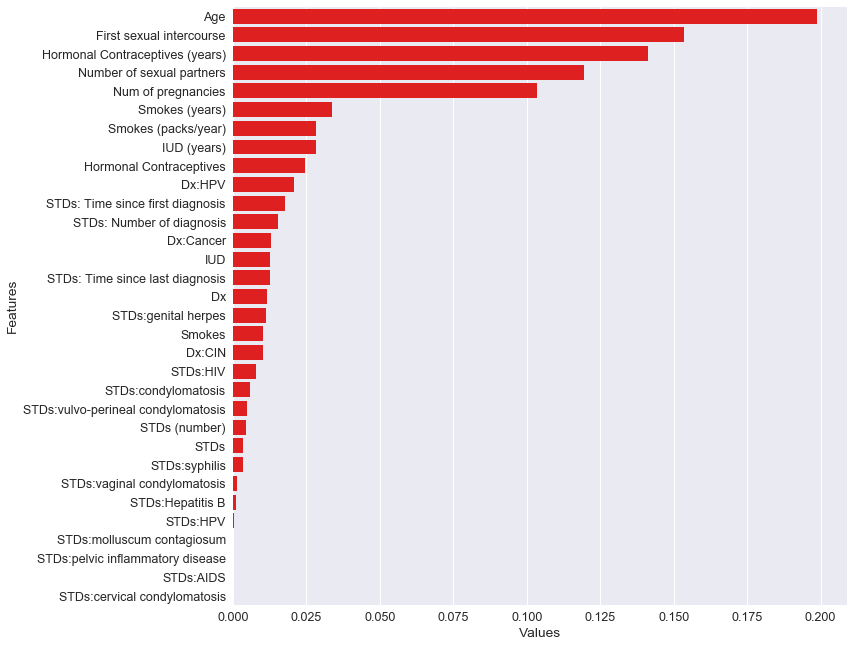

In [93]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

result_et = pd.DataFrame()
result_et['Features'] = X.columns
result_et ['Values'] = model.feature_importances_
result_et.sort_values('Values', inplace=True, ascending =False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_et, color="red")
plt.show()
